In [2]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
print('The working directory is parentdir: %s' %parentdir)
#===========import===============modules
#import modules
import numpy as np
import pandas as pd
import phconvert as phc
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/binfree-MS2/inter_photon_repo


In [3]:
os.chdir(parentdir)
%run alexa647_analysis.py
%run pt3t3r_to_hdf5.py
%run pycorrelate.py

# Code testing

## Fitting:intphoton

[[Model]]
    Model(bi_exp)
[[Variables]]
    A1:   9.4085e+05 +/- 3.23e+03 (0.34%) (init= 10000)
    t1:   1.1727e-05 +/- 3.82e-08 (0.33%) (init= 1e-05)
    A2:   2.7537e+05 +/- 3.71e+03 (1.35%) (init= 1000)
    t2:   1.2247e-06 +/- 4.00e-08 (3.26%) (init= 0.0001)
[[Correlations]] (unreported correlations are <  0.100)
    C(A1, t1)                    = -0.881 
    C(A1, t2)                    = -0.766 
    C(A1, A2)                    = -0.653 
    C(t1, t2)                    =  0.610 
    C(t1, A2)                    =  0.603 
    C(A2, t2)                    =  0.215 



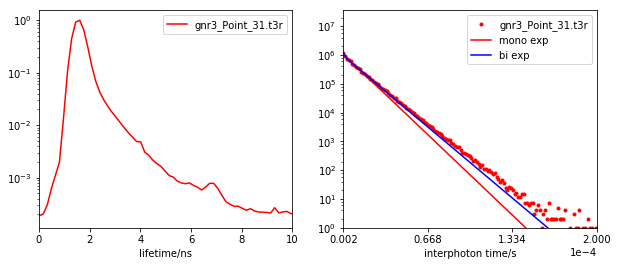

In [71]:
%run alexa647_analysis.py
temp_list = [gnr3_t3r]
nanotime_intphoton_filelist(temp_list, bins_nanotime=300,
                           bins_intphoton=500, nanotime_lim=(0, 10),
                           intphotn_lim=(0, 0.0002), 
                            fitting=True, figsize=(10, 4))

## nanotime filter

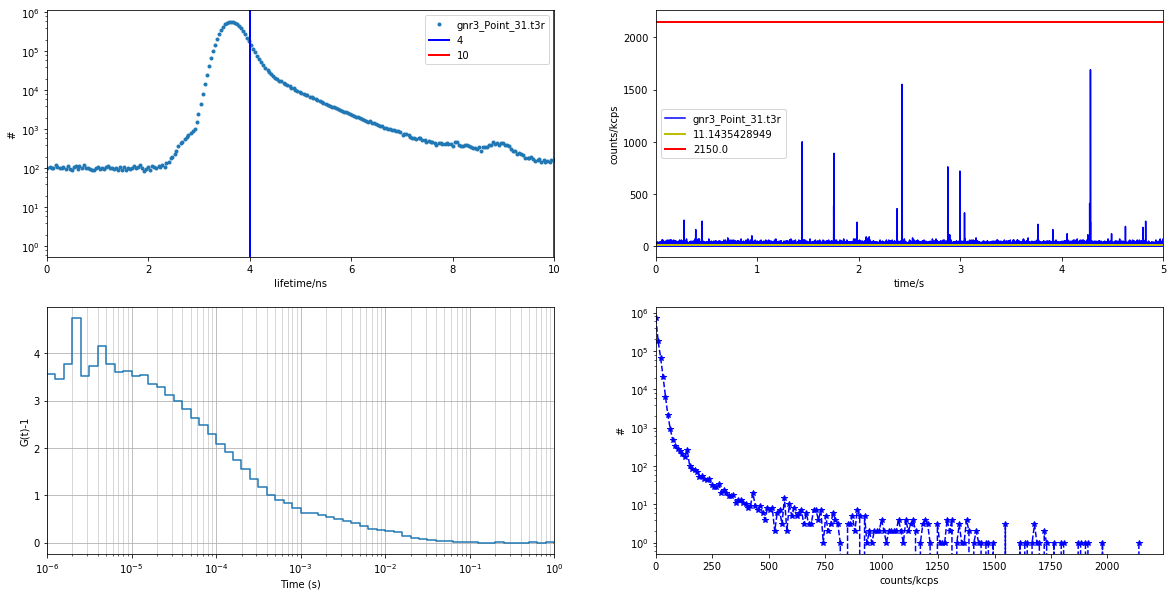

In [34]:
%run nanotime_filtering
timestamps_filtered = nanotime_filter(gnr3_t3r, nanotime_lim=(0, 10), nanotime_cor=10,
                    filter_range=[4, 10], bintime=0.1e-3, time_lim=(0, 5),
                    plotting=True, figsize=(20,10))

In [12]:
low=np.linspace(2, 6, 10);
high = np.linspace(4, 10, 20)
for i in low:
    for j in high:
        if i < j:
            nanotime_filter(gnr3_t3r, nanotime_lim=(0, 10), nanotime_cor=10,
                    filter_range=[i, j], bintime=0.1e-3, time_lim=(0, 5),
                    plotting=True, figsize=(20,5))
#             plt.close()

## intphoton filter

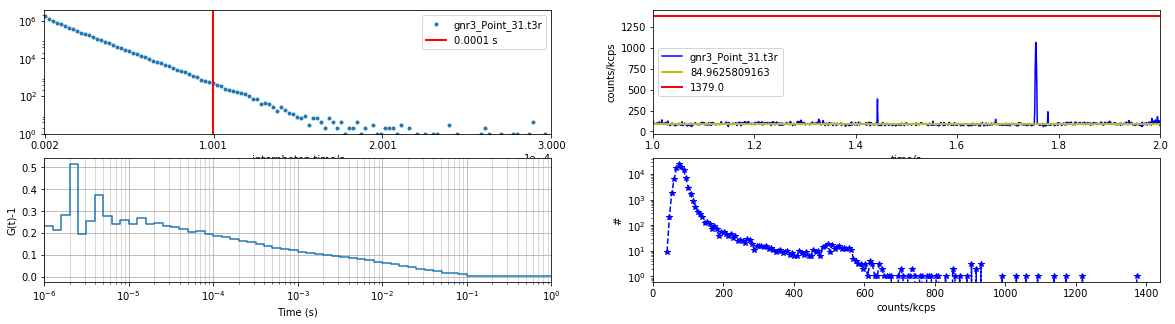

In [57]:
%run intphoton_filtering.py
intphoton_filter(gnr3_t3r, intphotn_lim=(0, 3e-4), bins_intphoton=300,
                    filter_val=10e-5, bintime=1e-3, time_lim=(1, 2),
                    plotting=True, fitting=False, figsize=(20,5))

In [ ]:
%run intphoton_filtering.py
gnr3_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/gnr3_Point_38.t3r');
filter_vals = np.linspace(1e-6, 1e-4, 30);
filter_vals = np.round(filter_vals, 6)
for i in filter_vals:
    intphoton_filter(gnr3_t3r, intphotn_lim=(0, 3e-4), bins_intphoton=300,
                    filter_val=i, bintime=0.1e-3, time_lim=(1, 2),
                    plotting=True, fitting=False, figsize=(20,5))

# 70%sucrose_50nmAlexa647_200mMMV_55%

In [4]:
os.chdir(parentdir)
gnr1_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/gnr1_Point_29.t3r');
gnr3_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/gnr3_Point_31.t3r');
gnr5_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/gnr5_Point_33.t3r');
gnr7_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/gnr7_Point_35.t3r');
gnrSurface_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_200mMMV_55%/surface.t3r');
gnr3_hepesIRF_t3r = os.path.abspath('data/20150408-09_3d/hepes_55%/gnr3_Point_3.t3r');
all_t3rfiles_alexa_200mMMV  = [gnr1_t3r, gnr3_t3r, gnr5_t3r, gnr7_t3r, gnrSurface_t3r, gnr3_hepesIRF_t3r];

### testing a file

In [111]:
#converting and loading t3r file
os.chdir(parentdir)
file_path_hdf5 = t3r_to_hdf5(filename=gnr3_t3r);
h5 = h5py.File(file_path_hdf5);
unit = h5['photon_data']['timestamps_specs']['timestamps_unit'].value;
tcspc_unit = h5['photon_data']['nanotimes_specs']['tcspc_unit'].value;
#checking detectors
detectors = h5['photon_data']['detectors'];
timestamps = h5['photon_data']['timestamps'];
print("Detector    Counts")
print("--------   --------")
for det, count in zip(*np.unique(detectors, return_counts=True)):
    print("%8d   %8d" % (det, count));
# Plotting a trace
# num_ph = int(3e6);
# t = h5['photon_data']['timestamps'][...][h5['photon_data']['detectors'][...] == 1];
# t_mic = h5['photon_data']['nanotimes'][...][h5['photon_data']['detectors'][...] == 1];
# bintime=10e-3 #in sec
# bins = int((max(t*unit)-min(t*unit))/bintime)
# binned_trace = np.histogram(t*unit, bins=bins)
# plt.plot(binned_trace[1][:-1], binned_trace[0], 'b')
# plt.show()

Detector    Counts
--------   --------
       0      15259
       1    8495719


## plot all time traces

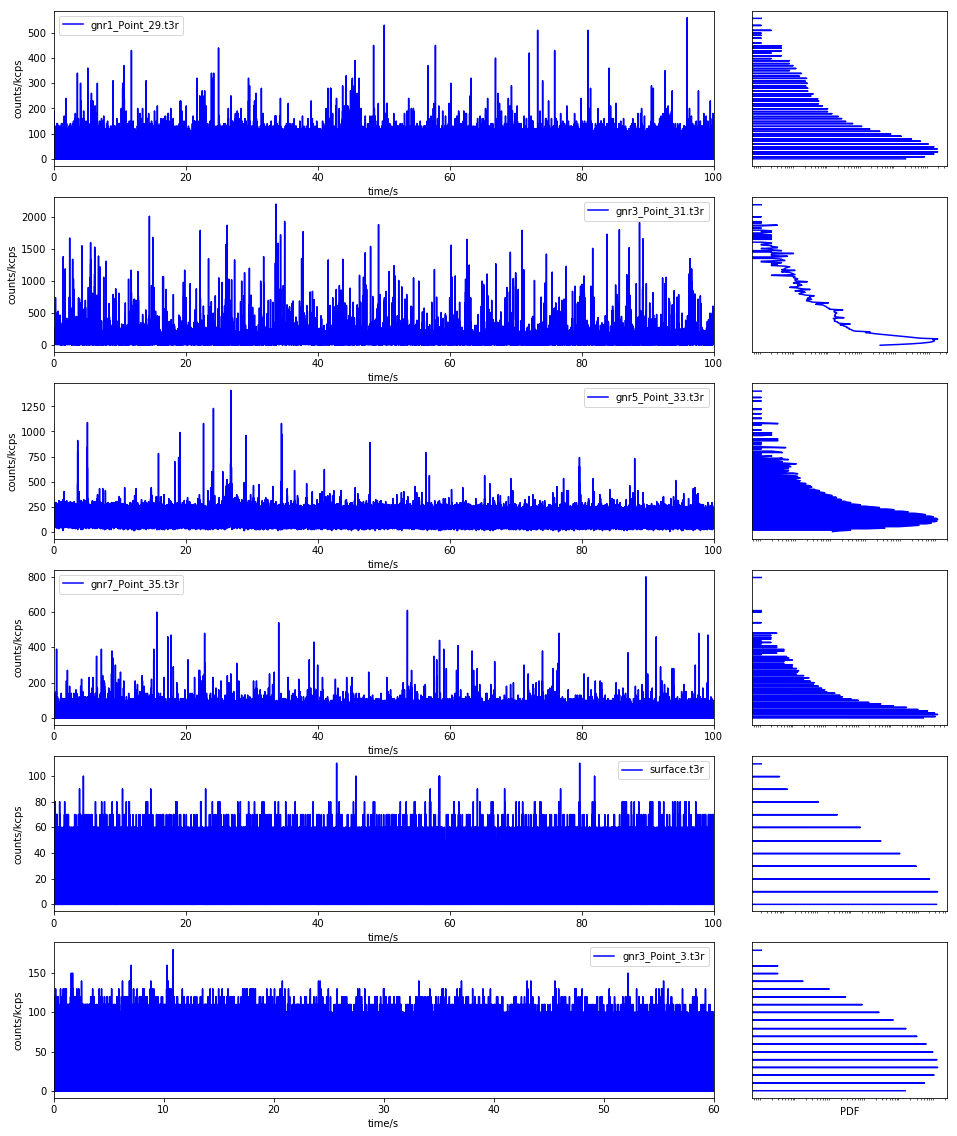

In [5]:
timetrace_hist_filelist(all_t3rfiles_alexa_200mMMV, bintime=0.1e-3, time_lim=(None, None), figsize=(16, 20))

## Plot all lifetimes and int_photon

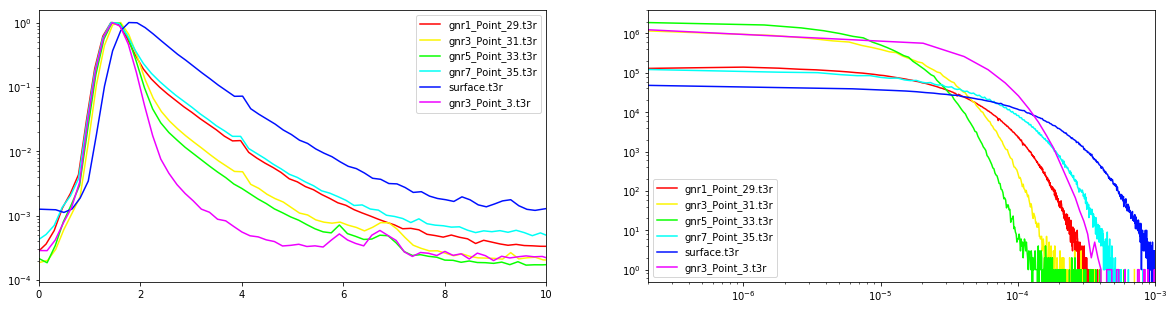

In [16]:
nanotime_intphoton_filelist(all_t3rfiles_alexa_200mMMV, bins_nanotime=300,
                           bins_intphoton=500, nanotime_lim=(0, 10),
                           intphotn_lim=(0, 0.001), figsize=(20, 5))

# 70%sucrose_50nmAlexa647_55%_200mMMV_again

In [114]:
os.chdir(parentdir)
gnr1_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/gnr1_Point_36.t3r');
gnr3_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/gnr3_Point_38.t3r');
gnr5_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/gnr5_Point_40.t3r');
gnr7_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/gnr7_Point_42.t3r');
gnrSurface_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%_200mMMV_again/surface_2.t3r');
gnr3_hepesIRF_t3r = os.path.abspath('data/20150408-09_3d/hepes_55%/gnr3_Point_3.t3r');
all_t3rfiles_alexa_200mMMV_again  = [gnr1_t3r, gnr3_t3r, gnr5_t3r, gnr7_t3r, gnrSurface_t3r, gnr3_hepesIRF_t3r];

## timetrace plot all

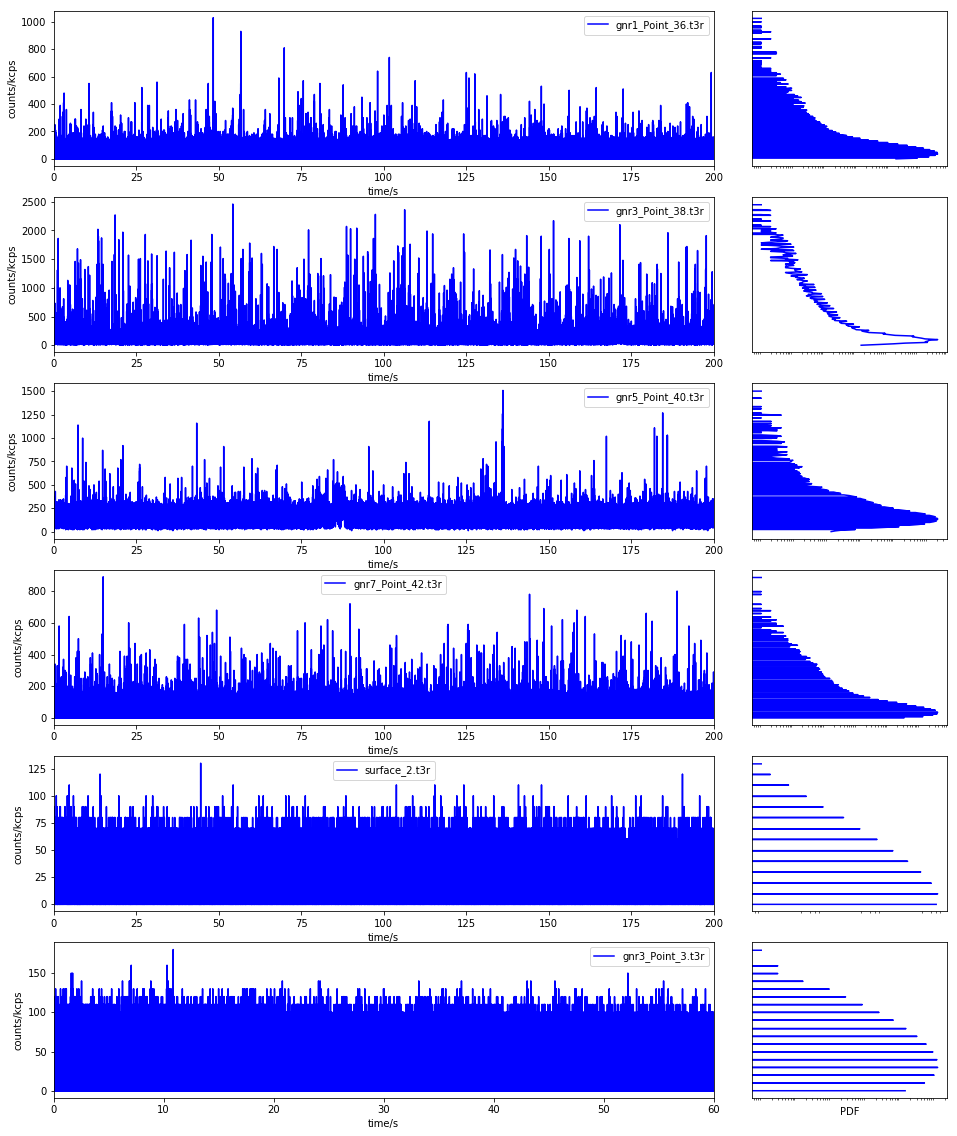

In [115]:
timetrace_hist_folder(all_t3rfiles_alexa_200mMMV_again, bintime=0.1e-3, time_lim=(None, None), figsize=(16, 20))

## lifetime and nanotime plot: all

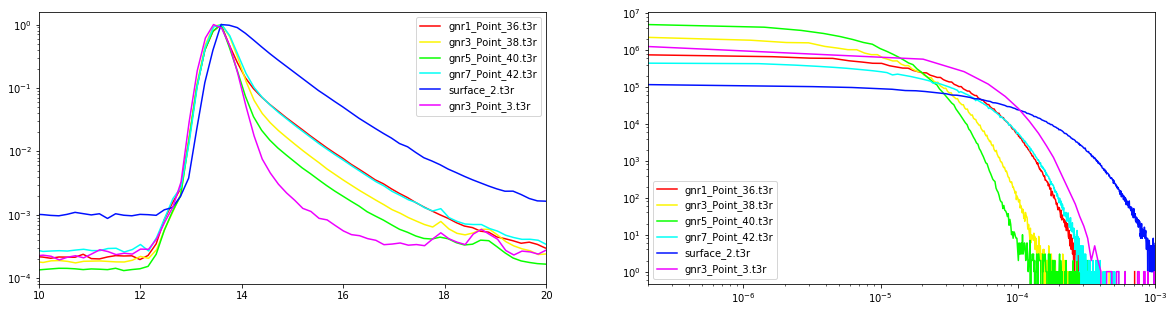

In [116]:
nanotime_intphoton_filelist(all_t3rfiles_alexa_200mMMV_again, bins_nanotime=300,
                           bins_intphoton=500, nanotime_lim=(10, 20),
                           intphotn_lim=(0, 0.001), figsize=(20, 5))

# 70%sucrose_50nmAlexa647_55% 

In [117]:
gnr3_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%/gnr_3_50nMAlexa647.t3r');
gnr5_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%/gnr_5_50nMAlexa647.t3r');
gnr7_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%/gnr_7_50nMAlexa647.t3r');
gnrSurface_t3r = os.path.abspath('data/20150408-09_3d/70%sucrose_50nmAlexa647_55%/Surface_50nMalexa647_2.t3r');
gnr3_hepesIRF_t3r = os.path.abspath('data/20150408-09_3d/hepes_55%/gnr3_Point_3.t3r');
all_t3rfiles_alexa  = [gnr1_t3r, gnr3_t3r, gnr5_t3r, gnr7_t3r, gnrSurface_t3r, gnr3_hepesIRF_t3r];

## timetraces: all

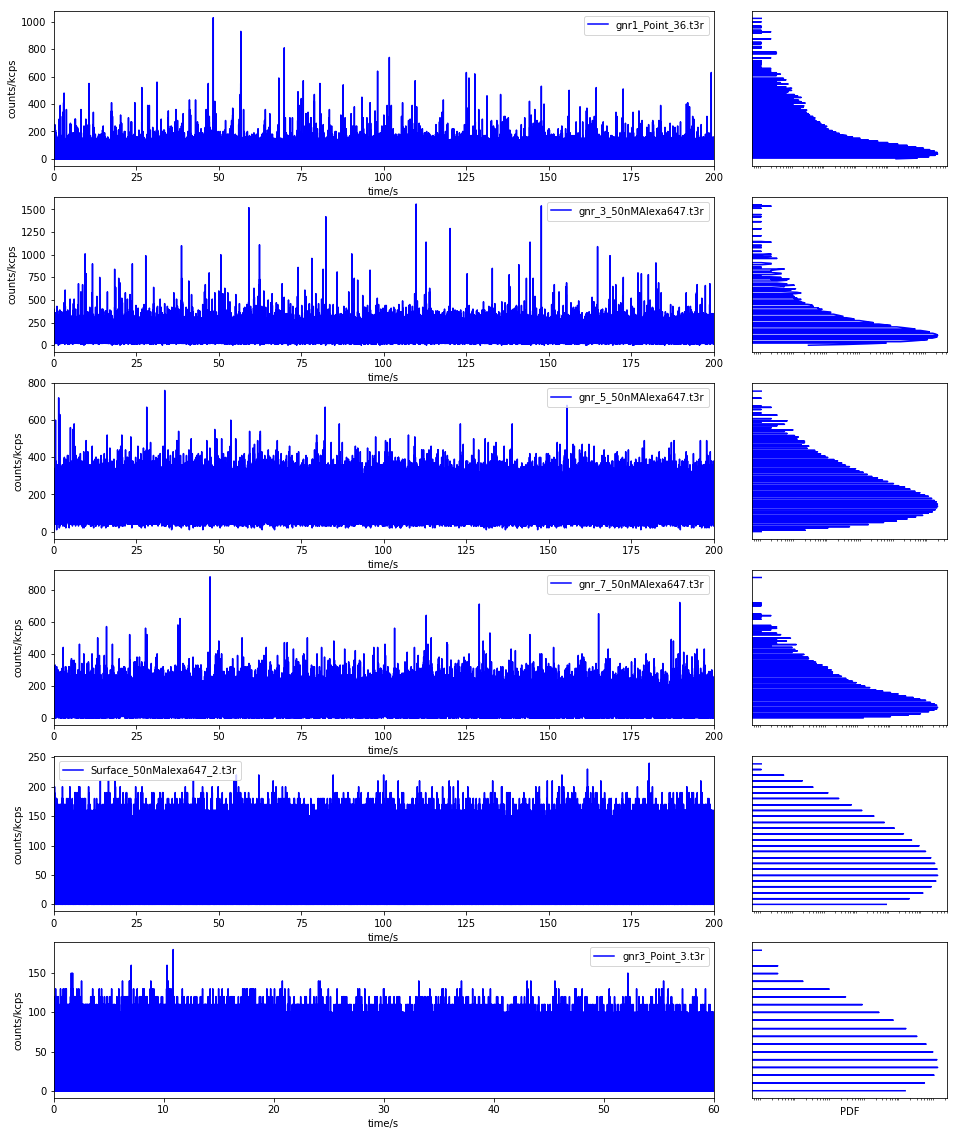

In [118]:
timetrace_hist_folder(all_t3rfiles_alexa, bintime=0.1e-3, time_lim=(None, None), figsize=(16, 20))

## lifetime and nanotimes: all

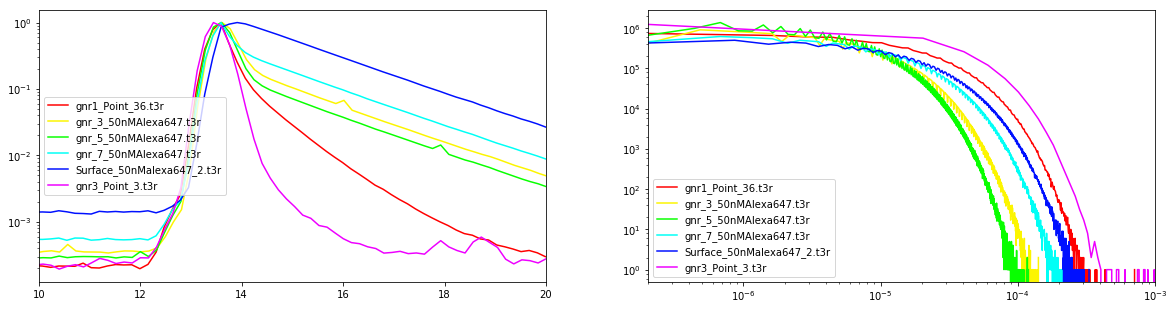

In [119]:
nanotime_intphoton_filelist(all_t3rfiles_alexa, bins_nanotime=300,
                           bins_intphoton=500, nanotime_lim=(10, 20),
                           intphotn_lim=(0, 0.001), figsize=(20, 5))

# 100nM_MB_70%Sucrose_55%

In [121]:
gnr3_t3r = os.path.abspath('data/20150408-09_3d/100nM_MB_70%Sucrose_55%/gnr_3.t3r');
gnr5_t3r = os.path.abspath('data/20150408-09_3d/100nM_MB_70%Sucrose_55%/gnr_5.t3r');
gnrSurface_t3r = os.path.abspath('data/20150408-09_3d/100nM_MB_70%Sucrose_55%/Surface_100nM_MB_70%sucrose_55%.t3r');
gnr3_hepesIRF_t3r = os.path.abspath('data/20150408-09_3d/hepes_55%/gnr3_Point_3.t3r');
solution_t3r = os.path.abspath('data/20150408-09_3d/100nM_MB_70%Sucrose_55%/solution_100nM_MB_70%sucrose_55%.t3r')
all_t3rfiles_MB  = [gnr1_t3r, gnr3_t3r, gnr5_t3r, gnr7_t3r, gnrSurface_t3r, gnr3_hepesIRF_t3r];

## time traces

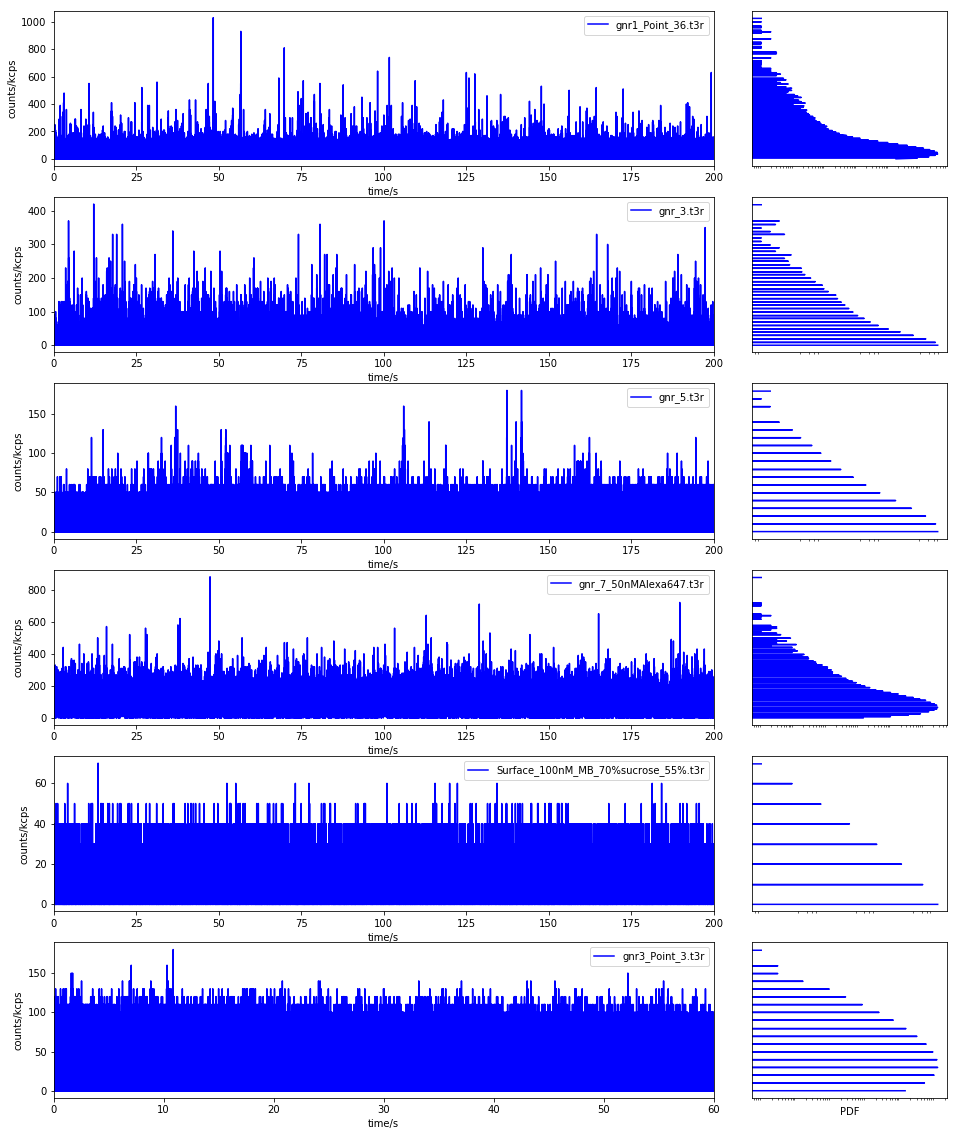

In [122]:
timetrace_hist_folder(all_t3rfiles_MB, bintime=0.1e-3, time_lim=(None, None), figsize=(16, 20))

## lifetime and intphoton times

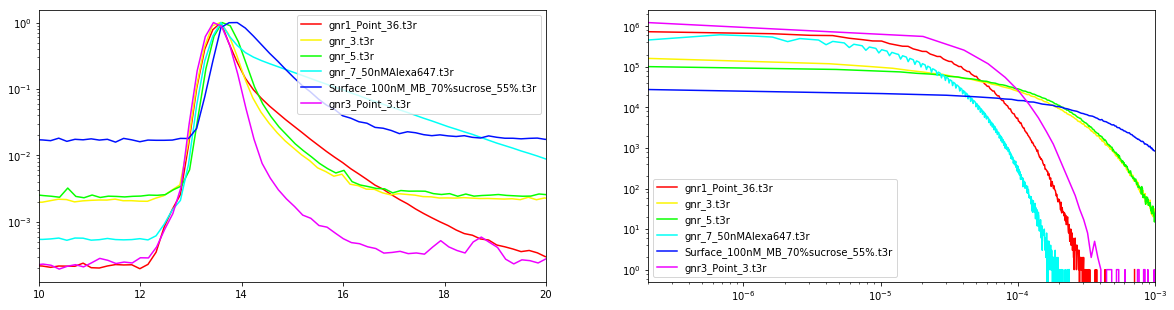

In [123]:
nanotime_intphoton_filelist(all_t3rfiles_MB, bins_nanotime=300,
                           bins_intphoton=500, nanotime_lim=(10, 20),
                           intphotn_lim=(0, 0.001), figsize=(20, 5))